<a href="https://colab.research.google.com/github/Raykiai/GroupTask1/blob/main/GroupTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting the Dataset**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import io

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor


dataset =files.upload()

Saving Housing Pricing.csv to Housing Pricing.csv


In [ ]:
df = pd.read_csv(io.StringIO(dataset['Housing Pricing.csv'].decode('utf-8')))

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# **Prepare Dataset**

Check for missing values

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
print (df.isnull())

         Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0     False       False     False  ...     False          False      False
1     False       False     False  ...     False          False      False
2     False       False     False  ...     False          False      False
3     False       False     False  ...     False          False      False
4     False       False     False  ...     False          False      False
...     ...         ...       ...  ...       ...            ...        ...
1455  False       False     False  ...     False          False      False
1456  False       False     False  ...     False          False      False
1457  False       False     False  ...     False          False      False
1458  False       False     False  ...     False          False      False
1459  False       False     False  ...     False          False      False

[1460 rows x 77 columns]


Total Count of missing values

In [ ]:
print (df.isnull().sum().sum())

1558


In [ ]:
df.shape

(1460, 77)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 77 columns]>

Find missing values in the columns (True= missing)

In [ ]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

Length of the original features

In [ ]:
original_features=list(df.columns)
original_features
len(original_features)

77

Find the list of columns which have missing values and the length of the missing features.


In [ ]:
features_with_missing=list(df.columns[df.isna().any()])
features_with_missing
len(features_with_missing)

15

In [ ]:
len(df)

1460

Find the percentage of columns with missing values

In [ ]:
for feature in features_with_missing:
  print(feature, '',df[feature].isna().sum()/len(df)*100)

LotFrontage  17.73972602739726
MasVnrType  0.547945205479452
MasVnrArea  0.547945205479452
BsmtQual  2.5342465753424657
BsmtCond  2.5342465753424657
BsmtExposure  2.6027397260273974
BsmtFinType1  2.5342465753424657
BsmtFinType2  2.6027397260273974
Electrical  0.0684931506849315
FireplaceQu  47.26027397260274
GarageType  5.5479452054794525
GarageYrBlt  5.5479452054794525
GarageFinish  5.5479452054794525
GarageQual  5.5479452054794525
GarageCond  5.5479452054794525


Dropping columns with 40% data missing

In [ ]:
df.dropna(axis=1,thresh=0.5*(len(df)),inplace=True)


Fill missing values using mean fill

In [ ]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
df['MasVnrArea']


0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [ ]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))

Features which will be filled

In [ ]:
ffill

['BsmtQual',
 'BsmtCond',
 'MasVnrType',
 'BsmtFinType1',
 'GarageFinish',
 'BsmtFinType2',
 'GarageType',
 'Electrical',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'BsmtExposure']

In [ ]:
for feature in mean_fill:
  df[feature].fillna(df[feature].mean(),inplace=True)

In [ ]:
for feature in ffill:
  df[feature].fillna(method='ffill',inplace=True)

In [ ]:
for feature in ffill:
  df[feature].fillna(method='bfill',inplace=True)

Check if missing values have been filed 

In [ ]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

Check if there are any missing values

In [ ]:
print (df.isnull().values.any())

True


Total count of missing values

In [ ]:
print (df.isnull().sum().sum())

690


Total number of missing values for each feature

In [ ]:
print (df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64


# **Encode the Dataset**

In [ ]:
display(df)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
cat_data=df.select_dtypes(include=['object']).copy()
cat_data.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Transfer the entire dataset to a matrix of numbers

Categorical features that have both nominals and ordinals

In [ ]:
cat_features=list(cat_data.columns)
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(cat_features)-set(nominal))
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice']

In [ ]:
df[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
df[numerical]


,BsmtUnfSF,OverallQual,LowQualFinSF,BsmtFinSF1,3SsnPorch,MSSubClass,BedroomAbvGr,PoolArea,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond,YearRemodAdd,BsmtHalfBath,ScreenPorch,KitchenAbvGr,GrLivArea,BsmtFinSF2,BsmtFullBath,GarageCars,FullBath,LotFrontage,EnclosedPorch,LotArea,SalePrice,GarageYrBlt,WoodDeckSF,MiscVal,2ndFlrSF,Fireplaces,YrSold,MoSold,Id,OpenPorchSF,HalfBath,YearBuilt,MasVnrArea,GarageArea
0,150,7,0,706,0,60,3,0,8,856,856,5,2003,0,0,1,1710,0,1,2,2,65.0,0,8450,208500,2003.0,0,0,854,0,2008,2,1,61,1,2003,196.0,548
1,284,6,0,978,0,20,3,0,6,1262,1262,8,1976,1,0,1,1262,0,0,2,2,80.0,0,9600,181500,1976.0,298,0,0,1,2007,5,2,0,0,1976,0.0,460
2,434,7,0,486,0,60,3,0,6,920,920,5,2002,0,0,1,1786,0,1,2,2,68.0,0,11250,223500,2001.0,0,0,866,1,2008,9,3,42,1,2001,162.0,608
3,540,7,0,216,0,70,3,0,7,961,756,5,1970,0,0,1,1717,0,1,3,1,60.0,272,9550,140000,1998.0,0,0,756,1,2006,2,4,35,0,1915,0.0,642
4,490,8,0,655,0,60,4,0,9,1145,1145,5,2000,0,0,1,2198,0,1,3,2,84.0,0,14260,250000,2000.0,192,0,1053,1,2008,12,5,84,1,2000,350.0,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,6,0,0,0,60,3,0,7,953,953,5,2000,0,0,1,1647,0,0,2,2,62.0,0,7917,175000,1999.0,0,0,694,1,2007,8,1456,40,1,1999,0.0,460
1456,589,6,0,790,0,20,3,0,7,2073,1542,6,1988,0,0,1,2073,163,1,2,2,85.0,0,13175,210000,1978.0,349,0,0,2,2010,2,1457,0,0,1978,119.0,500
1457,877,7,0,275,0,70,4,0,9,1188,1152,9,2006,0,0,1,2340,0,0,1,2,66.0,0,9042,266500,1941.0,0,2500,1152,2,2010,5,1458,60,0,1941,0.0,252
1458,0,5,0,49,0,20,2,0,5,1078,1078,6,1996,0,0,1,1078,1029,1,1,1,68.0,112,9717,142125,1950.0,366,0,0,0,2010,4,1459,0,0,1950,0.0,240


In [ ]:
for feature in ordinal:
  df[feature]=(df[feature].astype('category')).cat.codes

In [ ]:
for feature in cat_features:
    df[feature]=(df[feature].astype('category')).cat.codes

In [ ]:
df[nominal]

,MSZoning,LandContour,LotConfig,Neighborhood
0,3,3,4,5
1,3,3,2,24
2,3,3,4,5
3,3,3,0,6
4,3,3,2,15
...,...,...,...,...
1455,3,3,4,8
1456,3,3,4,14
1457,3,3,4,6
1458,3,3,4,12


# **Data Normalisation**

In [ ]:
df_nominal=pd.get_dummies(df[nominal])

In [ ]:
df_ordinal=df[ordinal]

In [ ]:
df_numerical=df[numerical]

In [ ]:
encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)

In [ ]:
encoded_data.head(3)

,BsmtUnfSF,OverallQual,LowQualFinSF,BsmtFinSF1,3SsnPorch,MSSubClass,BedroomAbvGr,PoolArea,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond,YearRemodAdd,BsmtHalfBath,ScreenPorch,KitchenAbvGr,GrLivArea,BsmtFinSF2,BsmtFullBath,GarageCars,FullBath,LotFrontage,EnclosedPorch,LotArea,SalePrice,GarageYrBlt,WoodDeckSF,MiscVal,2ndFlrSF,Fireplaces,YrSold,MoSold,Id,OpenPorchSF,HalfBath,YearBuilt,MasVnrArea,GarageArea,MSZoning,LandContour,LotConfig,Neighborhood,Exterior1st,ExterQual,BsmtCond,GarageCond,Electrical,LotShape,SaleType,Condition2,BsmtQual,Foundation,HeatingQC,Condition1,RoofMatl,Utilities,BsmtFinType1,RoofStyle,LandSlope,Heating,GarageQual,CentralAir,SaleCondition,BldgType,HouseStyle,FireplaceQu,Exterior2nd,Functional,GarageType,Street,MasVnrType,PavedDrive,BsmtFinType2,ExterCond,KitchenQual,GarageFinish,BsmtExposure
0,150,7,0,706,0,60,3,0,8,856,856,5,2003,0,0,1,1710,0,1,2,2,65.0,0,8450,208500,2003.0,0,0,854,0,2008,2,1,61,1,2003,196.0,548,3,3,4,5,12,2,3,4,4,3,8,2,2,2,0,2,1,0,2,1,0,1,4,1,4,0,5,0,13,6,1,1,1,2,5,4,2,1,3
1,284,6,0,978,0,20,3,0,6,1262,1262,8,1976,1,0,1,1262,0,0,2,2,80.0,0,9600,181500,1976.0,298,0,0,1,2007,5,2,0,0,1976,0.0,460,3,3,2,24,8,3,3,4,4,3,8,2,2,1,0,1,1,0,0,1,0,1,4,1,4,0,2,5,8,6,1,1,2,2,5,4,3,1,1
2,434,7,0,486,0,60,3,0,6,920,920,5,2002,0,0,1,1786,0,1,2,2,68.0,0,11250,223500,2001.0,0,0,866,1,2008,9,3,42,1,2001,162.0,608,3,3,4,5,12,2,3,4,4,0,8,2,2,2,0,2,1,0,2,1,0,1,4,1,4,0,5,5,13,6,1,1,1,2,5,4,2,1,2


In [ ]:
encoded_data.shape

(1460, 77)

In [ ]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
x=encoded_data.drop('SalePrice', axis=1)

In [ ]:
y=df[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
x=x.to_numpy()
x

array([[150.,   7.,   0., ...,   2.,   1.,   3.],
       [284.,   6.,   0., ...,   3.,   1.,   1.],
       [434.,   7.,   0., ...,   2.,   1.,   2.],
       ...,
       [877.,   7.,   0., ...,   2.,   1.,   3.],
       [  0.,   5.,   0., ...,   2.,   2.,   2.],
       [136.,   5.,   0., ...,   3.,   0.,   3.]])

In [ ]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
x.shape

(1460, 76)

In [ ]:
y.shape

(1460, 1)

In [ ]:
x=StandardScaler().fit_transform(x)
y=StandardScaler().fit_transform(y)

In [ ]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# **PCA Dimensionality reduction**

In [ ]:
pca=PCA(n_components=2)
p_components=pca.fit_transform(x)

In [ ]:
p_components


array([[ 2.00290514, -0.2066136 ],
       [ 0.36712895, -1.43193326],
       [ 2.76827186, -0.08107998],
       ...,
       [ 1.40620601,  2.76659131],
       [-3.0807911 , -2.32898981],
       [-0.93667622, -2.22924229]])

In [ ]:
pca.explained_variance_ratio_

array([0.13735767, 0.05340692])

In [ ]:
pca_var=PCA(0.9)
new_pcs=pca_var.fit_transform(x)

In [ ]:
pca_var.n_components_

49

In [ ]:
regressor = LassoCV()
regressor.fit(p_components,y)
regressor.coef_

array([0.26566693, 0.05961123])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=76, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               19712     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 257       
Total params: 151,553
Trainable params: 151,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 1s 14ms/step - loss: 0.3663 - val_loss: 0.2123
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1480 - val_loss: 0.2033
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0926 - val_loss: 0.1834
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0622 - val_loss: 0.1407
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.1380
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.1611
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1723
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.1462
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.1282
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.1870
Epoch 11/20
32/32 

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


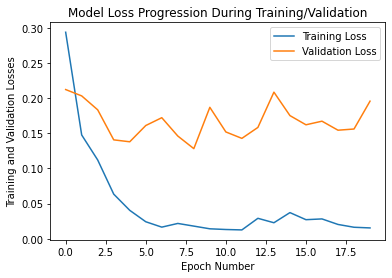

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
